In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width',None)

In [2]:
mavs_df = pd.read_csv('DALLAS_MAVS.csv')
print(mavs_df.columns)
print(mavs_df.dtypes)
print(mavs_df.info)
print(mavs_df.describe())
mavs_df.head()

mavs_df = mavs_df.rename(columns={'Field Goals Made':'FG',
                                  'Field Goals Attempted':'FGA',
                                  'Three Points Made':'3P',
                                  'Three Points Attempted':'3PA',
                                  'Free Throws Made':'FT',
                                  'Free Throws Attempted':'FTA',
                                  'Personal Fouls':'PFs'})

seasons = list(range(2011,2020))
mavs_fg = list(mavs_df.FG.values)[1:-1]
mavs_fga = list(mavs_df.FGA.values)[1:-1]


mavs_fg = mavs_fg[::-1]
mavs_fg[8] = 3124
mavs_fg = [int(b) for b in mavs_fg]

mavs_fga = mavs_fga[::-1]
mavs_fga = [int(ba) for ba in mavs_fga]

Index(['YEAR', 'Games', 'Field Goals Made', 'Field Goals Attempted',
       'Three Points Made', 'Three Points Attempted', 'Free Throws Made',
       'Free Throws Attempted', 'OFF', 'DEF', 'Points', 'Rebounds', 'Assists',
       'Steals', 'Blocks', 'Turnovers', 'Personal Fouls'],
      dtype='object')
YEAR                       object
Games                     float64
Field Goals Made           object
Field Goals Attempted     float64
Three Points Made         float64
Three Points Attempted    float64
Free Throws Made          float64
Free Throws Attempted     float64
OFF                       float64
DEF                       float64
Points                    float64
Rebounds                  float64
Assists                   float64
Steals                    float64
Blocks                    float64
Turnovers                 float64
Personal Fouls            float64
dtype: object
<bound method DataFrame.info of            YEAR  Games Field Goals Made  Field Goals Attempted  \
0   202

In [3]:

mavs_fgm = []
for i in range(len(mavs_fga)):
    fgm = mavs_fga[i] - mavs_fg[i]
    mavs_fgm.append(fgm)
    
mavs_fgm

[3014, 3710, 3609, 3781, 3836, 3782, 3914, 3940, 3648]

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

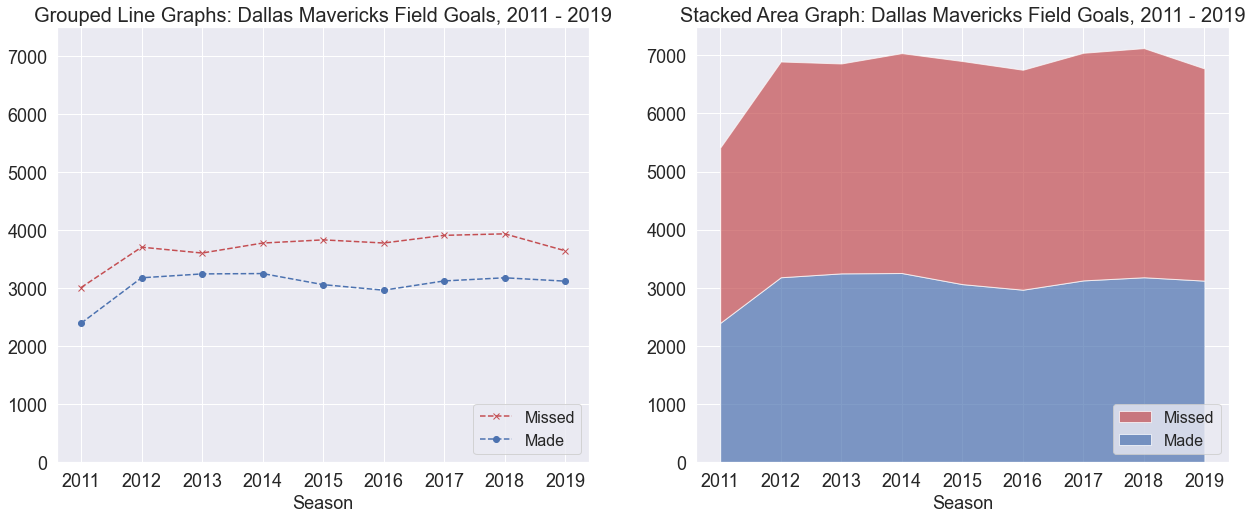

In [4]:
sns.set_theme()

plt.rc('font',size=25)

plt.figure(figsize=[21,8])

plt.subplot(121)
plt.plot(seasons,mavs_fgm,'rx--')
plt.plot(seasons,mavs_fg,'o--')
plt.ylim(0,7500)
plt.xlabel('Season',fontsize=18)
plt.title('Grouped Line Graphs: Dallas Mavericks Field Goals, 2011 - 2019',fontsize=20)
plt.legend(labels=['Missed','Made'],loc='lower right',fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(122)
plt.stackplot(seasons,mavs_fg,mavs_fgm,labels=['Made','Missed'],alpha=0.7,colors=['b','r'])
plt.xlabel('Season',fontsize=18)
plt.title('Stacked Area Graph: Dallas Mavericks Field Goals, 2011 - 2019',fontsize=20)
plt.legend(reversed(plt.legend().legendHandles),['Missed','Made'],loc='lower right',fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)



In [5]:
mavs_fga

[5412, 6892, 6858, 7036, 6900, 6750, 7042, 7122, 6772]

In [6]:
nba_df = pd.read_csv('nba_player_season_stats.csv').loc[:,['Year','Player','Pos','Age','Tm','G','PER','TS%',
                                                           'FG','FGA','FG%','2P','2PA','2P%','3P','3PA','3P%',
                                                           'ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']]


In [7]:
tm = nba_df.Tm.loc[(nba_df.Year == 2017.0)]
tm = list(set(tm))

teams = ['NYK','BOS','DET','PHI','LAL',
         'CHI','MIL','ATL','CLE','GSW',
         'HOU','POR','SAS','DEN','IND',
         'DAL','UTA','LAC','SAC','MIA',
         'ORL','MIN','TOR','WAS','PHO',
         'MEM','BRK','CHA','NOP','OKC']

nba = nba_df.loc[(nba_df.Tm.isin(teams))]
len(nba)
nba = nba.loc[(nba.Pos.isin(['PF','C','SG','SF','PG']))]

pos_pts = nba.loc[:,['Pos','PTS']]
points_by_position = pos_pts.groupby('Pos').sum()
points_by_position = pd.DataFrame(points_by_position).reset_index()
points_by_position.columns = ['Position','Points']

players_by_position = pos_pts.Pos.value_counts()
players_by_position = pd.DataFrame(players_by_position).reset_index()
players_by_position.columns = ['Position','Num_Players']

print(points_by_position,'\n')
print(players_by_position)

  Position     Points
0        C  1608402.0
1       PF  1849104.0
2       PG  1778991.0
3       SF  2017399.0
4       SG  2068638.0 

  Position  Num_Players
0       PF         3743
1        C         3607
2       SG         3600
3       SF         3553
4       PG         3466


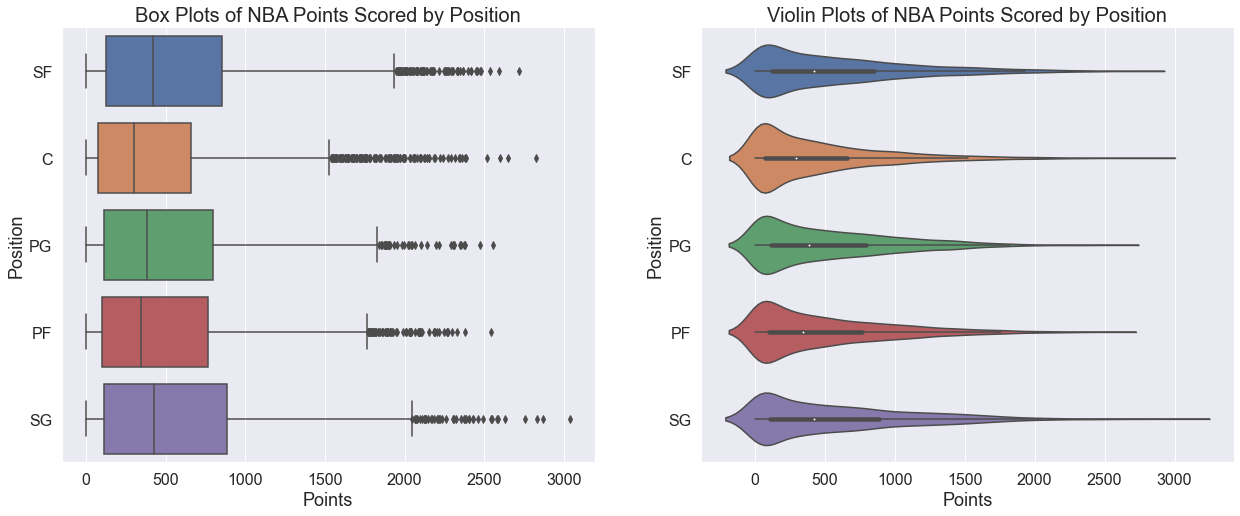

In [8]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=[21,8])

plt.subplot(121)
sns.boxplot(data=pos_pts,x='PTS',y='Pos')
plt.xlabel('Points',fontsize=18)
plt.ylabel('Position',fontsize=18)
plt.title('Box Plots of NBA Points Scored by Position',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(122)
sns.violinplot(data=pos_pts,x='PTS',y='Pos')
plt.xlabel('Points',fontsize=18)
plt.ylabel('Position',fontsize=18)
plt.title('Violin Plots of NBA Points Scored by Position',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.savefig('groupedBoxAndViolinPlots',format='png')

In [9]:
points_by_team = nba.loc[:,['Pos','Tm','PTS']]

pts_by_tm = points_by_team.groupby(['Tm','Pos']).sum()

pts_tm = points_by_team.groupby(['Tm']).sum()
pts_tm = pts_tm.sort_values(by='PTS',ascending=False)

top5teams_scoring = ['BOS','NYK','DET','LAL','PHI']

top5 = pts_by_tm.loc[top5teams_scoring]

t5 = top5.reset_index()

x = list(t5.Tm.unique())


map_teams = {'BOS':'Boston Celtics','PHI':'Philadelphia 76ers','LAL':'Los Angeles Lakers','NYK':'New York Knicks','DET':'Detroit Pistons'}
map_pos = {'PG':'Point Guard','SF':'Small Forward','SG':'Shooting Guard','PF':'Power Forward','C':'Center'}

t5['Pos'] = t5['Pos'].map(map_pos)
t5['Tm'] = t5.Tm.map(map_teams)
t5

,Tm,Pos,PTS
0,Boston Celtics,Center,98270.0
1,Boston Celtics,Power Forward,114145.0
2,Boston Celtics,Point Guard,107586.0
3,Boston Celtics,Small Forward,124827.0
4,Boston Celtics,Shooting Guard,116221.0
5,New York Knicks,Center,102633.0
6,New York Knicks,Power Forward,108830.0
7,New York Knicks,Point Guard,100528.0
8,New York Knicks,Small Forward,110562.0
9,New York Knicks,Shooting Guard,121047.0


Text(0.5, 1.0, 'Total Points by Position for the Highest-Scoring NBA Teams')

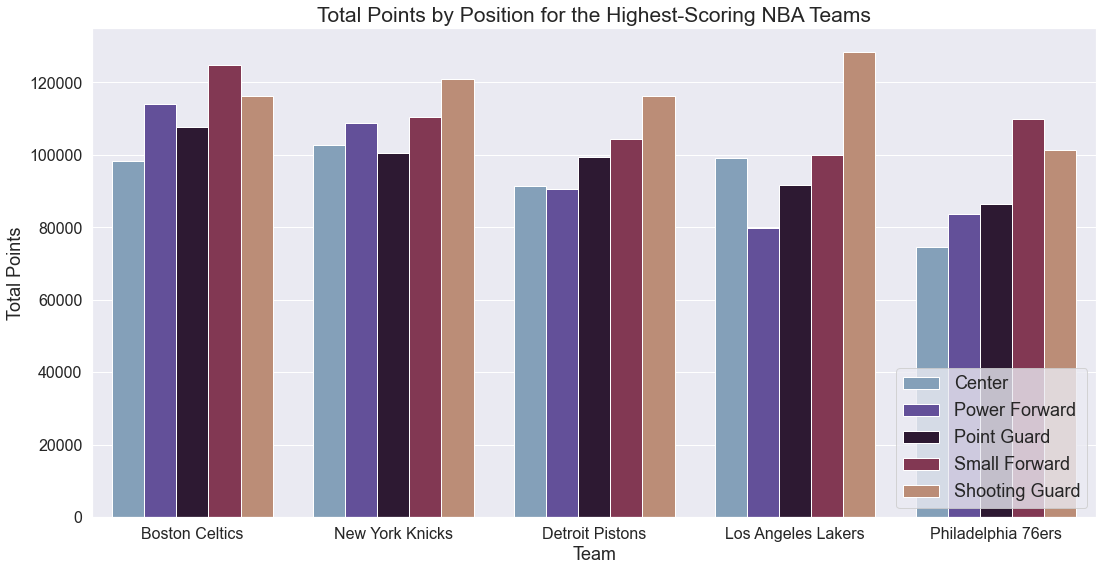

In [10]:
plt.figure(figsize=[18,9])

sns.barplot(data=t5,x='Tm',y='PTS',hue='Pos',palette='twilight')

plt.xlabel('Team',fontsize=18)
plt.ylabel('Total Points',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,135000)
plt.legend(fontsize=18,loc='lower right')

plt.title('Total Points by Position for the Highest-Scoring NBA Teams',fontsize=21)



In [11]:
nba['TS'] = nba['TS%']
nba = nba.drop(columns='TS%')

Text(0.5, 1.0, 'Bubble Plot of NBA Players Points, Assists, and Rebounds by Position')

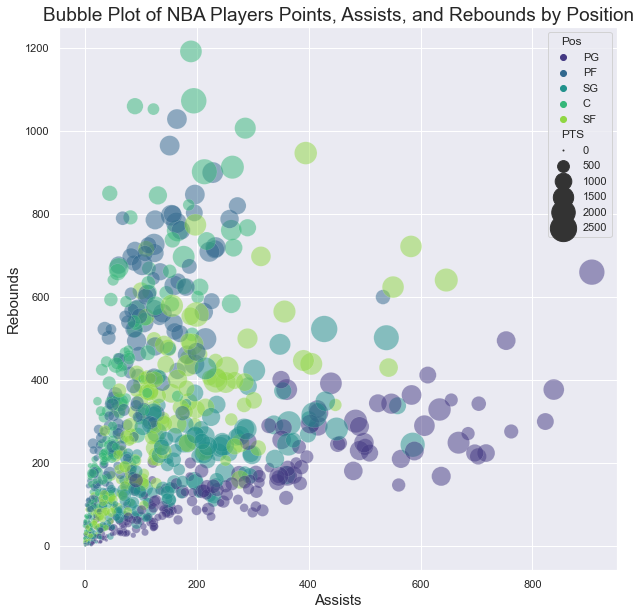

In [12]:
nba1 = nba.sample(1000)

plt.figure(figsize=[10,10])
sns.scatterplot(x=nba1.AST,y=nba1.TRB,size=nba1.PTS,sizes=(1,700),hue=nba1.Pos,palette='viridis',alpha=0.5)
plt.xlabel('Assists',fontsize=15)
plt.ylabel('Rebounds',fontsize=15)
plt.title('Bubble Plot of NBA Players Points, Assists, and Rebounds by Position',fontsize=19)



In [13]:
SC = nba.loc[(nba['Player']=='Stephen Curry')]

X = list(range(2010,2018))
Y = SC['PTS'].to_list()

y_tics = list(range(0,2401,600))

print(len(X),len(Y))

8 8


(array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
        2018.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

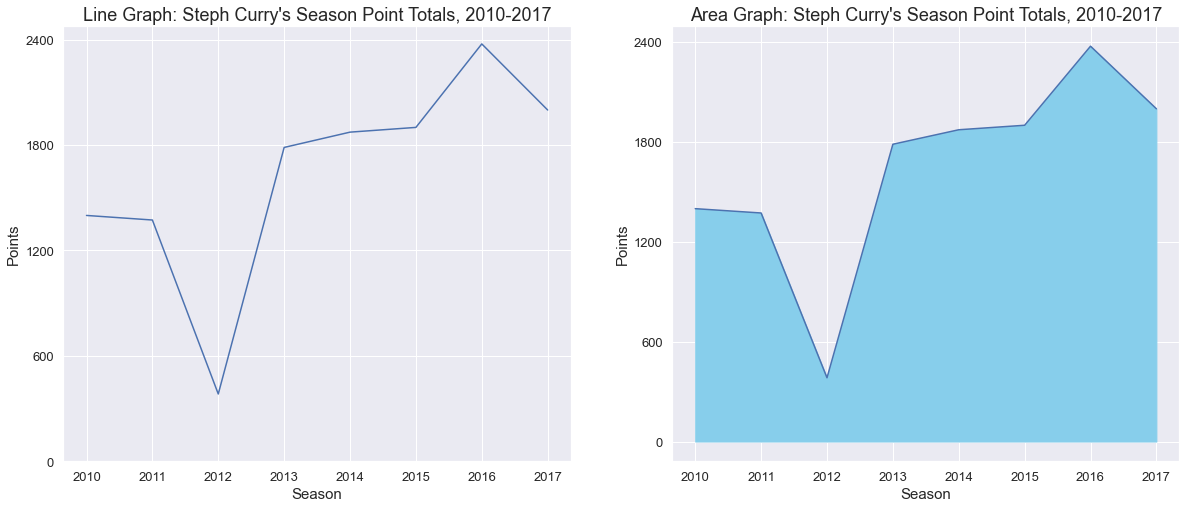

In [23]:
plt.figure(figsize=[20,8])
plt.subplot(122)
plt.title('Area Graph: Steph Curry\'s Season Point Totals, 2010-2017',fontsize=18)
plt.fill_between(x=X,y1=Y,color='skyblue')
plt.plot(X,Y)
plt.yticks(y_tics,fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel('Season',fontsize=15)
plt.ylabel('Points',fontsize=15)

plt.subplot(121)
plt.title('Line Graph: Steph Curry\'s Season Point Totals, 2010-2017',fontsize=18)
plt.xlabel('Season',fontsize=15)
plt.ylabel('Points',fontsize=15)
plt.plot(X,Y)
plt.yticks(y_tics,fontsize=13)
plt.xticks(fontsize=13)



In [15]:
nba.head()

,Year,Player,Pos,Age,Tm,G,PER,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS
13,1950.0,Vince Boryla,SF,22.0,NYK,59.0,NaN,204.0,600.0,0.340,204.0,600.0,0.340,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,NaN,203.0,612.0,0.426
119,1950.0,George Kaftan,SF,21.0,BOS,55.0,NaN,199.0,535.0,0.372,199.0,535.0,0.372,NaN,NaN,NaN,NaN,NaN,NaN,145.0,NaN,NaN,NaN,92.0,534.0,0.426
153,1950.0,John Mahnken,C,27.0,BOS,24.0,NaN,44.0,168.0,0.262,44.0,168.0,0.262,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,74.0,111.0,0.302
163,1950.0,Dick McGuire*,PG,24.0,NYK,68.0,NaN,190.0,563.0,0.337,190.0,563.0,0.337,NaN,NaN,NaN,NaN,NaN,NaN,386.0,NaN,NaN,NaN,160.0,584.0,0.417
303,1950.0,Brady Walker,PF,28.0,BOS,68.0,NaN,218.0,583.0,0.374,218.0,583.0,0.374,NaN,NaN,NaN,NaN,NaN,NaN,109.0,NaN,NaN,NaN,100.0,508.0,0.401


In [16]:
games = pd.read_csv('games_details.csv')
print(games.columns)
games.head()

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')


/Users/christine/hueco_mundo/hueco_mundo/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,1.0,6.0,0.167,0.0,5.0,0.000,1.0,1.0,1.0,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,2.0,12.0,0.167,1.0,8.0,0.125,0.0,0.0,0.0,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,9.0,12.0,0.750,0.0,0.0,0.000,2.0,5.0,0.4,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,9.0,20.0,0.450,5.0,11.0,0.455,1.0,1.0,1.0,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,0.0,5.0,0.000,0.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


In [17]:
nba.head()

,Year,Player,Pos,Age,Tm,G,PER,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS
13,1950.0,Vince Boryla,SF,22.0,NYK,59.0,NaN,204.0,600.0,0.340,204.0,600.0,0.340,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,NaN,203.0,612.0,0.426
119,1950.0,George Kaftan,SF,21.0,BOS,55.0,NaN,199.0,535.0,0.372,199.0,535.0,0.372,NaN,NaN,NaN,NaN,NaN,NaN,145.0,NaN,NaN,NaN,92.0,534.0,0.426
153,1950.0,John Mahnken,C,27.0,BOS,24.0,NaN,44.0,168.0,0.262,44.0,168.0,0.262,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,74.0,111.0,0.302
163,1950.0,Dick McGuire*,PG,24.0,NYK,68.0,NaN,190.0,563.0,0.337,190.0,563.0,0.337,NaN,NaN,NaN,NaN,NaN,NaN,386.0,NaN,NaN,NaN,160.0,584.0,0.417
303,1950.0,Brady Walker,PF,28.0,BOS,68.0,NaN,218.0,583.0,0.374,218.0,583.0,0.374,NaN,NaN,NaN,NaN,NaN,NaN,109.0,NaN,NaN,NaN,100.0,508.0,0.401


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

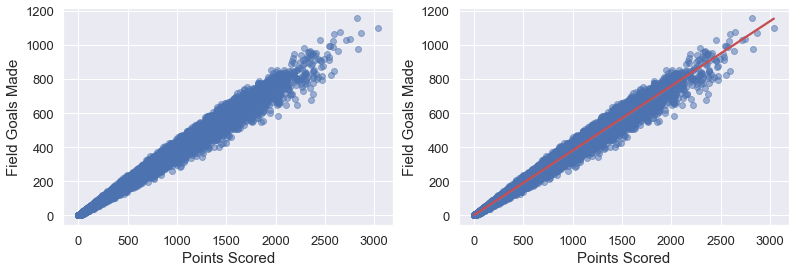

In [18]:

plt.figure(figsize=[13,4])

plt.subplot(121)
plt.scatter(data=nba,x='PTS',y='FG',alpha=0.5)
plt.xlabel('Points Scored',fontsize=15)
plt.ylabel('Field Goals Made',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.subplot(122)
sns.regplot(data=nba,x='PTS',y='FG',line_kws={'color':'r'},scatter_kws={'alpha':0.5})
plt.xlabel('Points Scored',fontsize=15)
plt.ylabel('Field Goals Made',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)



/Users/christine/hueco_mundo/hueco_mundo/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/christine/hueco_mundo/hueco_mundo/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/christine/hueco_mundo/hueco_mundo/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/christine/hueco_mundo/hueco_mundo/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarm Plot: 3 Pointers by Position')

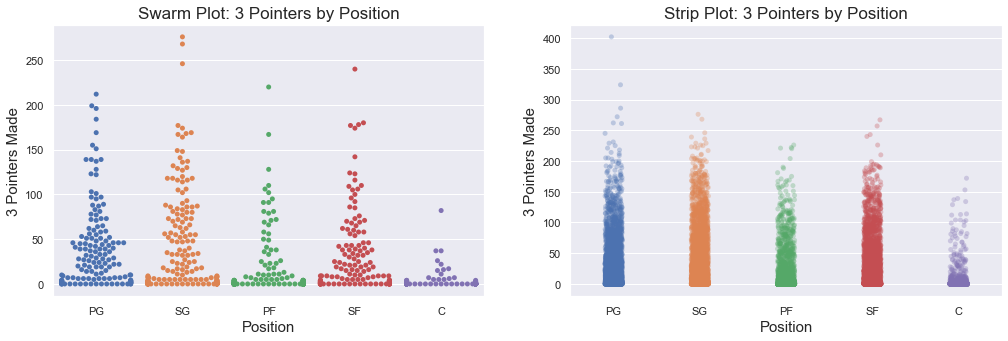

In [19]:
nba_sample = nba.sample(1000)

plt.figure(figsize=[17,5])

plt.subplot(122)
sns.stripplot(data=nba,x='Pos',y='3P',alpha=0.3,order=['PG','SG','PF','SF','C'])
plt.ylabel('3 Pointers Made',fontsize=15)
plt.xlabel('Position',fontsize=15)
plt.title('Strip Plot: 3 Pointers by Position',fontsize=17)

plt.subplot(121)
sns.swarmplot(data=nba_sample,x='Pos',y='3P',order=['PG','SG','PF','SF','C'])
plt.ylabel('3 Pointers Made',fontsize=15)
plt.xlabel('Position',fontsize=15)
plt.title('Swarm Plot: 3 Pointers by Position',fontsize=17)


In [20]:
games.TEAM_ABBREVIATION.unique()

array(['WAS', 'CHA', 'IND', 'DET', 'BOS', 'ATL', 'CLE', 'BKN', 'NOP',
       'MIA', 'ORL', 'NYK', 'LAL', 'MIL', 'SAC', 'MIN', 'HOU', 'OKC',
       'DAL', 'PHX', 'CHI', 'POR', 'GSW', 'PHI', 'UTA', 'SAS', 'LAC',
       'DEN', 'MEM', 'TOR', 'NOH', 'NJN', 'SEA', 'NOK'], dtype=object)

In [21]:
east_teams = ['PHI','BOS','BKN','NYK','CHA','MIA','WAS','CHI','CLE','TOR','MIL','IND','DET','ORL','ATL']
west_teams = ['LAL','HOU','LAC','OKC','DEN','PHX','SAC','MIN','MEM','UTA','SAS','POR','DAL','NOP','GSW']

east = games.loc[games.TEAM_ABBREVIATION.isin(east_teams)]
west = games.loc[games.TEAM_ABBREVIATION.isin(west_teams)]